**Zillow Data Visualization**

The data is scrapped from zillow by the code I mentioned in the README file. The whole dataset just contains the basic housing sale posts information in the greater Los Angeles area. Some basic data visualizations are performmed here. 

In [3]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
pwd = '/content/drive/My Drive/Colab Notebooks/data visualization/data/Zillow_90001_to_90099.csv'
base = '/content/drive/My Drive/Colab Notebooks/data visualization/data/'

Install the package used to access the google map API and get the location coordinates.

In [5]:
!pip3 install python-googlegeocoder
!pip3 install folium

Import the packages used 

In [0]:
import numpy as np
import pandas as pd
from googlegeocoder import GoogleGeocoder # Package used to access google api to have the geologcal data
import matplotlib.pyplot as plt
import seaborn as sb # Pcakge used to do statistical visualization
import os

import folium # Use to do the geometric map plotting

**Read the Zillow Data CVS file**

In [73]:
dat = pd.read_csv(pwd)
print(len(dat))
dat.head(10)

4273


,address,city,state,zip,price,sqft,bedrooms,bathrooms,days_on_zillow,sale_type,url
0,5927 Junction St,LOS ANGELES,CA,90001,435000.0,1222.0,3.0,1.0,1.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
1,8116 Stanford Ave,LOS ANGELES,CA,90001,615000.0,3280.0,5.0,3.0,1.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
2,819 E 75th St,LOS ANGELES,CA,90001,750000.0,1322.0,4.0,4.0,NaN,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
3,838 E 76th St,LOS ANGELES,CA,90001,440000.0,1192.0,3.0,2.0,2.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
4,636 E 73rd St,LOS ANGELES,CA,90001,778000.0,3488.0,10.0,6.0,4.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
5,8019 Hooper Ave,LOS ANGELES,CA,90001,439000.0,1061.0,4.0,2.0,NaN,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...
6,842 E 85th St,LOS ANGELES,CA,90001,415000.0,1512.0,4.0,2.0,NaN,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
7,7809 Crockett Blvd,Los Angeles,CA,90001,1399000.0,NaN,10.0,10.0,17.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
8,7512 Mckinley Ave,LOS ANGELES,CA,90001,370000.0,858.0,2.0,2.0,134.0,House for sale,http://www.zillow.com/homes/for_sale//homedeta...
9,7920 Hooper Ave,LOS ANGELES,CA,90001,459000.0,1550.0,4.0,2.0,1.0,Apartment for sale,http://www.zillow.com/homes/for_sale//homedeta...


**Missing Values Check**

In [22]:
print('total rows contain NaN: ',dat.isnull().T.any().T.sum())
col_names = list(dat.columns.values)
for name in col_names:
  print('total number of NaN in the column ',name,' : ',dat[name].isnull().sum())

total rows contain NaN:  2525
total number of NaN in the column  address  :  0
total number of NaN in the column  city  :  0
total number of NaN in the column  state  :  0
total number of NaN in the column  zip  :  0
total number of NaN in the column  price  :  897
total number of NaN in the column  sqft  :  110
total number of NaN in the column  bedrooms  :  217
total number of NaN in the column  bathrooms  :  336
total number of NaN in the column  days_on_zillow  :  1369
total number of NaN in the column  sale_type  :  0
total number of NaN in the column  url  :  0


**Housing for sales in each Zipcode Area**

We would plot out the number of housing sale posts by the zipcode through a barplot. It would give us a biasic idea about how the housing  for sale distributed by the areas.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


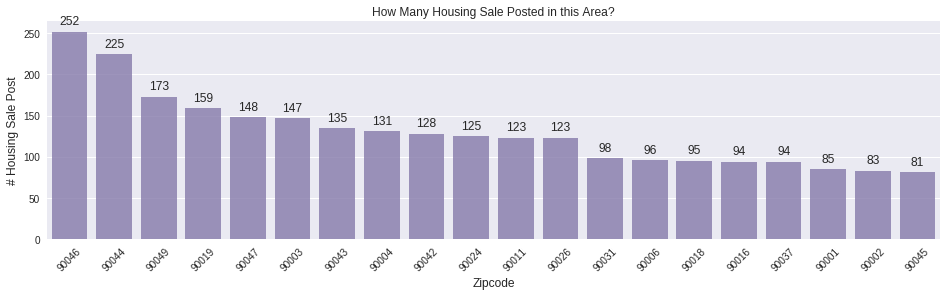

In [9]:
color = sb.color_palette() # Set up the color choices

x=dat['zip'].value_counts() # Count the values for each zipcode
x=x.sort_values(ascending=False) # Sort the counts descendingly
x=x.iloc[0:20] # Choose the first 20 zipcodes to visualize
plt.figure(figsize=(16,4))
ax = sb.barplot(x.index,x.values,alpha=0.8,color=color[3],order=x.index)
plt.title("How Many Housing Sale Posted in this Area?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# Housing Sale Post', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**Housing Sale Posting Geometric Distribution**

We would access the google map API to transfer all the address to be the location coordinates. And then we could visualize all the posts directly on a map.

You only need to run the codes below for one time and please save the result into a csv file.

There might be some address that does not have a proper coordinates found from google map. These coordinates have been set to be (0,0).

In [0]:
geocoder = GoogleGeocoder("<Your own API Key>")
Address = dat['address'].values
loc_cord = []
for t,ads in enumerate(Address):
  try:
    search = geocoder.get(ads)
    loc_cord.append([search[0].geometry.location.lat,search[0].geometry.location.lng])
  except ValueError:
    loc_cord.append([0,0])
    continue
  if t%100 == 0:
    print('No.%d coordinates finished' %t)
    
print(len(loc_cord))

Save the coordinates to a csv file

In [0]:
lat = [a[0] for a in loc_cord]
lng = [a[1] for a in loc_cord]

coord_dat_dic = {'LAT':lat,'LNG':lng}
coord_dat = pd.DataFrame(coord_dat_dic)
coord_dat.to_csv(os.path.join(base,'coord.csv'))

Read the coordinates file

In [23]:
coord_dat = pd.read_csv(os.path.join(base,'coord.csv'))
coord_dat.head(10)

,Unnamed: 0,LAT,LNG
0,0,33.986130,-118.242726
1,1,33.964936,-118.262772
2,2,33.972437,-118.260113
3,3,33.970926,-118.259416
4,4,33.973677,-118.263670
5,5,33.965978,-118.252228
6,6,33.960873,-118.259218
7,7,33.968307,-118.237164
8,8,33.971553,-118.260610
9,9,33.966804,-118.251703


Detect the addresses not have proper coordinates

In [45]:
not_proper_idx = coord_dat[coord_dat['LAT']==0].index
coord_dat = coord_dat.drop(not_proper_idx)
dat = dat.drop(not_proper_idx)
dat.reset_index()
print(len(dat))

4273


Basic View of coordinates of all the addresses

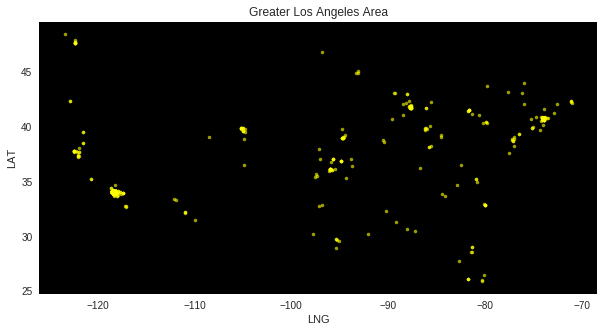

In [12]:
plt.rcParams["axes.grid"] = False # Turn of the grid lines

fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,1,1)
coord_dat.plot(kind='scatter', x='LNG', y='LAT',\
                        color='yellow',s=10, alpha=.6,subplots=True, ax=ax)
ax.set_title("Greater Los Angeles Area")
ax.set_facecolor('black')

Let's visualize this into the real map. About 20% of the original data for each zipcode has been sampled to mark in the map. The markers in the map are labeled with the respective zipcodes.

In [100]:
lat = coord_dat['LAT'].values
lng = coord_dat['LNG'].values

median_lat = np.median(lat)
median_lng = np.median(lng)

zipcodes = dat['zip'].values
zipcode = list(set(zipcodes))
# Sample 20% of the posts in each zipcode
sample_lat = []
sample_lng = []
sample_zip = []
for i,zip in enumerate(zipcode):
  lt = [lat[i] for i,val in enumerate(zipcodes==zipcode[i]) if val]
  lg = [lng[i] for i,val in enumerate(zipcodes==zipcode[i]) if val]
  k = int(np.ceil(len(lt)*0.2))
  for j in range(k):
    sample_lat.append(lt[j])
    sample_lng.append(lg[j])
    sample_zip.append(zipcode[i])
#print(len(sample_lat))
#print(len(sample_lng))
#print(len(sample_zip))

# Print out the map of Los Angeles Area
map_LA = folium.Map(location=[median_lat,median_lng],zoom_start=11)
# Add marker of 20% of sale posts into the map
for t,zip in enumerate(sample_zip[0:1000]):
  folium.Marker([sample_lat[t],sample_lng[t]], popup=str(zip)).add_to(map_LA)
map_LA

**Housing Values Distribution**

We would check the averged price per square feet for each area and the distributions of housing price for several area first.

In [74]:
# Calculate the Averaged price per square feet respect to zipcodes.
dat = dat.dropna(subset=['price', 'sqft'])
print(len(dat))

3281


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


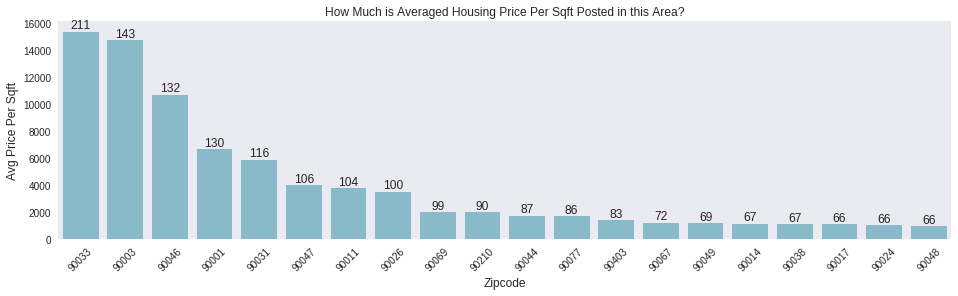

In [102]:
zipcodes = dat['zip'].values
zipcode = list(set(zipcodes))

# Calculate the averaged price per square feet in each zipcode area
price = dat['price']
sqft = dat['sqft']
price_sqft = np.array(price)/np.array(sqft)
avgsqft_price = []
for i,zip in enumerate(zipcode):
  sqftp = [price_sqft[i] for i,val in enumerate(zipcodes==zipcode[i]) if val]
  avgsqft_price.append(np.mean(sqftp))
avgsqft_price = np.array(avgsqft_price)

# Plot Out the Bar chart
zipcode = np.array(zipcode)[np.argsort(-avgsqft_price)[0:20]]
avgsqft_price = avgsqft_price[np.argsort(-avgsqft_price)[0:20]]

plt.figure(figsize=(16,4))
ax = sb.barplot(zipcode,avgsqft_price,alpha=0.8,color=color[5],order=zipcode)
plt.title("How Much is Averaged Housing Price Per Sqft Posted in this Area?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('Avg Price Per Sqft', fontsize=12)
plt.xlabel('Zipcode', fontsize=12)

x=dat['zip'].value_counts() # Count the values for each zipcode
x=x.iloc[np.argsort(-avgsqft_price)[0:20]] # Sort the counts

#adding the text labels
rects = ax.patches
labels = x.values

for t in range(20):
    rect = rects[t]
    label = labels[t]
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()  

We could see that it seems the area with high avg price per sqft has more sale posts online.

**Heat map for the House sale value**

In [116]:
dat = pd.read_csv(pwd)
coord_dat = pd.read_csv(os.path.join(base,'coord.csv'))
d = {'LAT':coord_dat['LAT'].values,'LNG':coord_dat['LNG'].values,'price':dat['price'].values,'sqft':dat['sqft'].values}
dat_map = pd.DataFrame(data=d)
dat_map = dat_map.dropna(subset=['price', 'sqft'])
print(len(dat_map))

d1 = {'LAT':dat_map['LAT'].values,'LNG':dat_map['LNG'].values,\
      'per_sqft':dat_map['price'].values/dat_map['sqft'].values}
per_sqft_map = pd.DataFrame(data=d1)
print(len(per_sqft_map))

3281
3281


In [126]:
from folium.plugins import HeatMap

data = dat_map[['LAT','LNG']].as_matrix()

m = folium.Map([np.median(dat_map['LAT'].values),np.median(dat_map['LNG'].values)], zoom_start=11)

HeatMap(data).add_to(m)

m

In [117]:
data = dat_map[['LAT','LNG','price']].as_matrix()

m = folium.Map([np.median(dat_map['LAT'].values),np.median(dat_map['LNG'].values)], zoom_start=11)

HeatMap(data, radius = 25, gradient={.4: 'blue', .65: 'lime', 1: 'red'}).add_to(m)

m

**Heat Map for the House Sale Prive per SQFT**

In [125]:
data = per_sqft_map[['LAT','LNG','per_sqft']].as_matrix()

m = folium.Map([np.median(per_sqft_map['LAT'].values),np.median(per_sqft_map['LNG'].values)], zoom_start=11)

HeatMap(data, radius = 25, gradient={.8: 'blue', .9: 'lime', 1: 'red'}).add_to(m)

m